In [87]:
import yfinance as yf
import pandas as pd
import numpy as np

Importing the yfinance library and setting up the dataset from January 1990 for the machine learning algorithm.

In [88]:
sp500 = yf.Ticker('^GSPC')
sp500 = sp500.history(period='max')
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-14 00:00:00-04:00,5829.810059,5871.410156,5829.569824,5859.850098,3005250000,0.0,0.0
2024-10-15 00:00:00-04:00,5866.740234,5870.359863,5804.479980,5815.259766,3882120000,0.0,0.0
2024-10-16 00:00:00-04:00,5816.580078,5846.520020,5808.339844,5842.470215,3467230000,0.0,0.0


<Axes: xlabel='Date'>

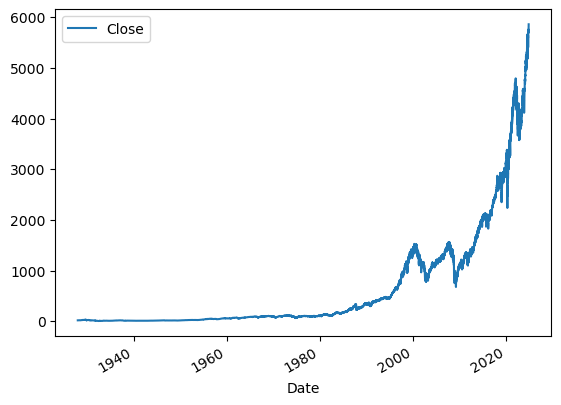

In [89]:
sp500.plot.line(y="Close", use_index=True)

In [90]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [91]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [92]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500 = sp500.loc["1990-01-01":"2022-05-08"].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-05-02 00:00:00-04:00,4130.609863,4169.810059,4062.510010,4155.379883,5163790000,4175.479980,1
2022-05-03 00:00:00-04:00,4159.779785,4200.100098,4147.080078,4175.479980,4582050000,4300.169922,1
2022-05-04 00:00:00-04:00,4181.180176,4307.660156,4148.910156,4300.169922,5136360000,4146.870117,0


Machine Learning Algorithm

In [93]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [94]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [95]:
preds = pd.Series(preds, index=test.index)

In [96]:
precision_score(test["Target"], preds)

0.45977011494252873

<Axes: xlabel='Date'>

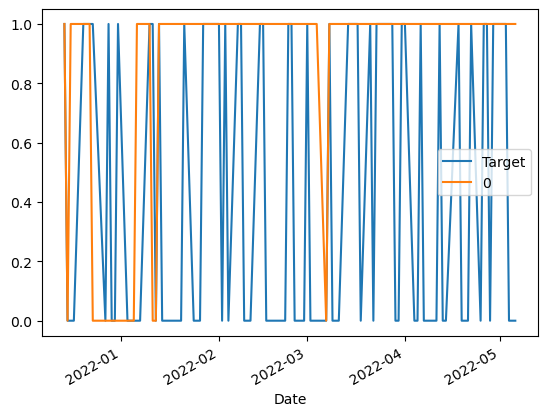

In [97]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [98]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [99]:
def backtest(data, model, predictors, start=2500, step=250):
    all_preds = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()
        predictions = predict(train, test, predictors, model)
        all_preds.append(predictions)
    return pd.concat(all_preds)

In [100]:
predictions = backtest(sp500, model, predictors)

In [101]:
predictions["Predictions"].value_counts()

Predictions
0    3355
1    2296
Name: count, dtype: int64

Here we predicted the binary classifier: that the market would go down(0) on 3355 days and up(1) on 2296 days

In [102]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5361498257839721

In [103]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.537073
0    0.462927
Name: count, dtype: float64

Now, lets add additional predictors such as moving averages and to the model 

In [104]:
horizons = [2,5,60,250,1000]
new_predictors = []

for h in horizons:
    rolling_averages = sp500.rolling(h).mean()
    
    ratio_column = f"Close_Ratio_{h}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{h}"
    sp500[trend_column] = sp500.shift(1).rolling(h).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [105]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02 00:00:00-04:00,4130.609863,4169.810059,4062.510010,4155.379883,5163790000,4175.479980,1,1.002830,1.0,0.992497,3.0,0.945656,27.0,0.935613,132.0,1.209129,553.0
2022-05-03 00:00:00-04:00,4159.779785,4200.100098,4147.080078,4175.479980,4582050000,4300.169922,1,1.002413,2.0,0.997284,4.0,0.951403,27.0,0.940161,132.0,1.214467,553.0
2022-05-04 00:00:00-04:00,4181.180176,4307.660156,4148.910156,4300.169922,5136360000,4146.870117,0,1.014712,2.0,1.021396,4.0,0.980498,28.0,0.968178,132.0,1.250156,554.0


 Update the model by increasing number of estimators and reduce min_sample_split because we have added additional columns to the sp500 data, and increasing the threshold confidence level to 60%

In [106]:
model_new = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(sp500, model_new, new_predictors)
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])